In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import tensorflow as tf
from tensorflow import keras
import xgboost as xgb

Conjunto de Dados

In [ ]:
df = pd.read_csv('/content/dados/imoveisfinal.csv')

Retirando andar pois a maioria não informou

In [ ]:
df = df.drop(columns=["andar"])

Transformando preco em float

In [ ]:
df.info()
# Remover linhas com preco ou bairro nulos
df_clean = df.dropna()

# Converter a coluna preco para float
df_clean["preco"] = (
    df_clean["preco"]
    .str.replace("R$", "", regex=False)
    .str.replace(".", "", regex=False)
    .str.replace(",", ".", regex=False)
    .astype(float) / 1000
)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22763 entries, 0 to 22762
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   preco            22749 non-null  object 
 1   bairro           22689 non-null  object 
 2   area             22760 non-null  float64
 3   quartos          22319 non-null  float64
 4   suites           22763 non-null  int64  
 5   vagas            22763 non-null  int64  
 6   banheiros        22244 non-null  float64
 7   salao de festas  22763 non-null  int64  
 8   mobiliado        22763 non-null  int64  
 9   varanda          22763 non-null  int64  
 10  academia         22763 non-null  int64  
 11  espaco gourmet   22763 non-null  int64  
 12  playground       22763 non-null  int64  
 13  churrasqueira    22763 non-null  int64  
 14  piscina          22763 non-null  int64  
dtypes: float64(3), int64(10), object(2)
memory usage: 2.6+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 2

<ipython-input-5-2719fc12128f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["preco"] = (


Removendo outliers

In [ ]:
print("Antes:", df_clean.shape[0])
df_clean = df_clean[df_clean["area"] <= 300]
print("Depois:", df_clean.shape[0])

Antes: 22063
Depois: 21634


In [ ]:
print("Antes:", df_clean.shape[0])
df_clean = df_clean[df_clean["preco"] <= 10000]
print("Depois:", df_clean.shape[0])

Antes: 21634
Depois: 21607


In [ ]:
print("Antes:", df_clean.shape[0])
df_clean = df_clean[df_clean["suites"] <= 8]
print("Depois:", df_clean.shape[0])

Antes: 21607
Depois: 21603


In [ ]:
print("Antes:", df_clean.shape[0])
df_clean = df_clean[df_clean["banheiros"] <= 8]
print("Depois:", df_clean.shape[0])

Antes: 21603
Depois: 21599


In [ ]:
print("Antes:", df_clean.shape[0])
df_clean = df_clean[df_clean["quartos"] <= 8]
print("Depois:", df_clean.shape[0])

Antes: 21599
Depois: 21594


In [ ]:
print("Antes:", df_clean.shape[0])
df_clean = df_clean[df_clean["vagas"] <= 8]
print("Depois:", df_clean.shape[0])

Antes: 21594
Depois: 21568


In [32]:
# Converter colunas de float para int
df_clean['area'] = df_clean['area'].astype(int)
df_clean['quartos'] = df_clean['quartos'].astype(int)
df_clean['banheiros'] = df_clean['banheiros'].astype(int)

# Verificar se deu certo
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21568 entries, 0 to 22762
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   preco            21568 non-null  float64
 1   bairro           21568 non-null  object 
 2   area             21568 non-null  int64  
 3   quartos          21568 non-null  int64  
 4   suites           21568 non-null  int64  
 5   vagas            21568 non-null  int64  
 6   banheiros        21568 non-null  int64  
 7   salao de festas  21568 non-null  int64  
 8   mobiliado        21568 non-null  int64  
 9   varanda          21568 non-null  int64  
 10  academia         21568 non-null  int64  
 11  espaco gourmet   21568 non-null  int64  
 12  playground       21568 non-null  int64  
 13  churrasqueira    21568 non-null  int64  
 14  piscina          21568 non-null  int64  
dtypes: float64(1), int64(13), object(1)
memory usage: 2.6+ MB


Aplicar one-hot encoding na coluna bairro

In [ ]:
bairro_dummies = pd.get_dummies(df_clean["bairro"], prefix="bairro")

Concatenar com os dados numéricos

In [ ]:
X_full = pd.concat([df_clean.select_dtypes(include=[np.number]).drop(columns=["preco"]), bairro_dummies], axis=1)
y_full = df_clean["preco"]

Dividir em treino e teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.2, random_state=42)

Regressão Linear

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Regressão Linear - MSE:", mean_squared_error(y_test, y_pred_lr))
print("Regressão Linear - RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("Regressão Linear - R²:", r2_score(y_test, y_pred_lr))
print("Regressão Linear - MAPE:", mean_absolute_percentage_error(y_test, y_pred_lr))

Regressão Linear - MSE: 312901.6843161455
Regressão Linear - RMSE: 559.3761563707784
Regressão Linear - R²: 0.7030945243676642
Regressão Linear - MAPE: 0.30835687881467433


Árvore de decisão

In [ ]:
dt = DecisionTreeRegressor(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Árvore de Decisão - MSE:", mean_squared_error(y_test, y_pred_dt))
print("Árvore de Decisão - RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt)))
print("Árvore de Decisão - R²:", r2_score(y_test, y_pred_dt))
print("Árvore de Decisão - MAPE:", mean_absolute_percentage_error(y_test, y_pred_dt))

Árvore de Decisão - MSE: 353533.04300980055
Árvore de Decisão - RMSE: 594.5864470451716
Árvore de Decisão - R²: 0.6645403283271629
Árvore de Decisão - MAPE: 0.3333099479940851


Regressão com redes neurais

In [ ]:
model_nn = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

model_nn.compile(optimizer='adam', loss='mse')
model_nn.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0, validation_split=0.1)

y_pred_nn = model_nn.predict(X_test).flatten()
print("Regressão com Redes Neurais - MSE:", mean_squared_error(y_test, y_pred_nn))
print("Regressão com Redes Neurais - RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_nn)))
print("Regressão com Redes Neurais - R²:", r2_score(y_test, y_pred_nn))
print("Regressão com Redes Neurais - MAPE:", mean_absolute_percentage_error(y_test, y_pred_nn))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Regressão com Redes Neurais - MSE: 226518.01341890034
Regressão com Redes Neurais - RMSE: 475.93908582811343
Regressão com Redes Neurais - R²: 0.785062075774962
Regressão com Redes Neurais - MAPE: 0.2447610196540897


XGBoost

In [ ]:
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, learning_rate=0.1, max_depth=4)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost - MSE:", mean_squared_error(y_test, y_pred_xgb))
print("XGBoost - RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("XGBoost - R²:", r2_score(y_test, y_pred_xgb))
print("XGBoost - MAPE:", mean_absolute_percentage_error(y_test, y_pred_xgb))

XGBoost - MSE: 226926.33456005805
XGBoost - RMSE: 476.36785634639335
XGBoost - R²: 0.7846746288908357
XGBoost - MAPE: 0.24166410757927662


Gráficos

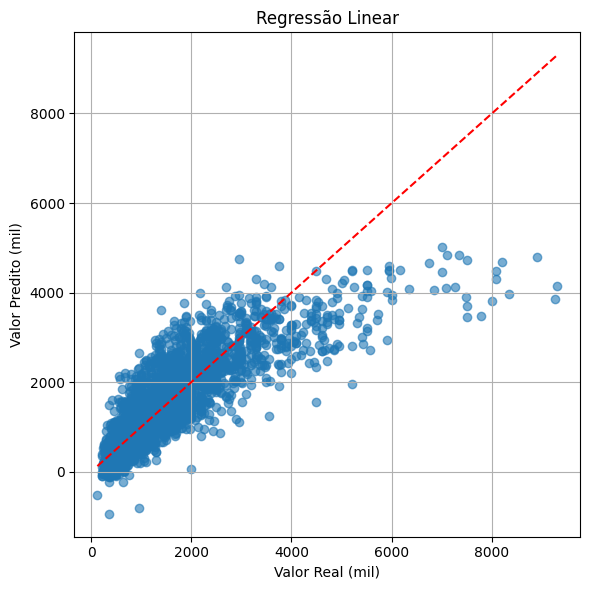

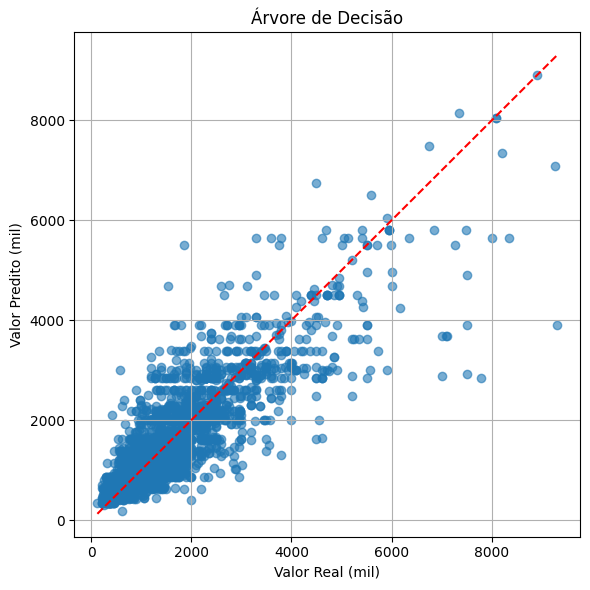

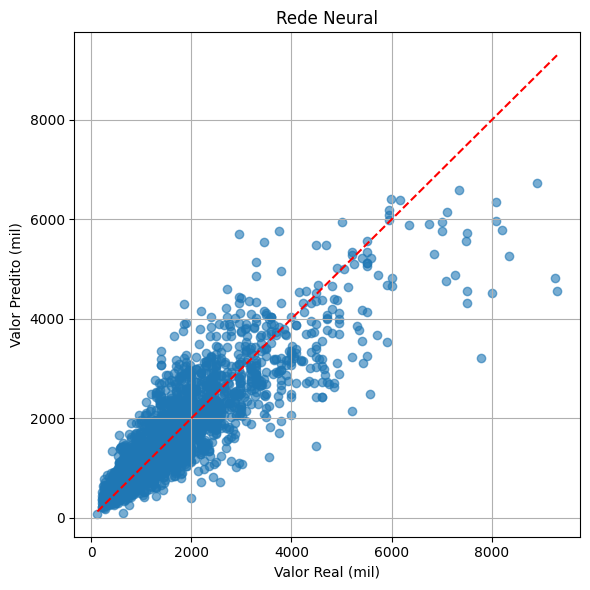

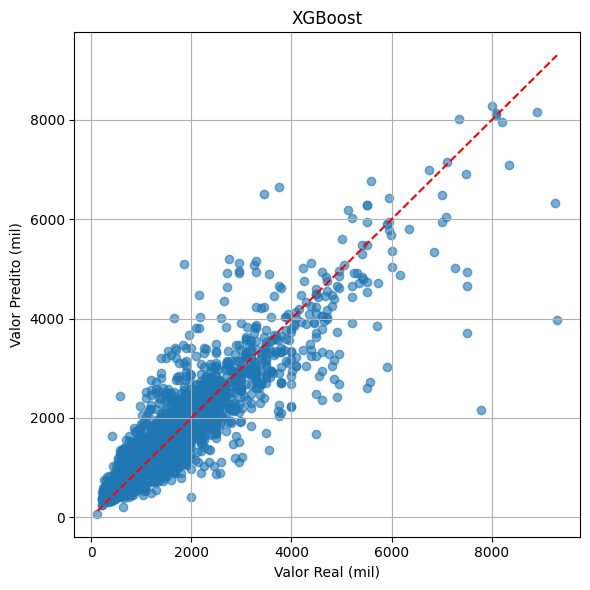

In [ ]:
import matplotlib.pyplot as plt

def plot_real_vs_pred(y_test, y_pred, title):
    plt.figure(figsize=(6, 6))
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Valor Real (mil)")
    plt.ylabel("Valor Predito (mil)")
    plt.title(title)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Linear Regression
plot_real_vs_pred(y_test, y_pred_lr, "Regressão Linear")

# Decision Tree
plot_real_vs_pred(y_test, y_pred_dt, "Árvore de Decisão")

# Rede Neural (sem embedding)
plot_real_vs_pred(y_test, y_pred_nn, "Rede Neural")

# XGBoost
plot_real_vs_pred(y_test, y_pred_xgb, "XGBoost")



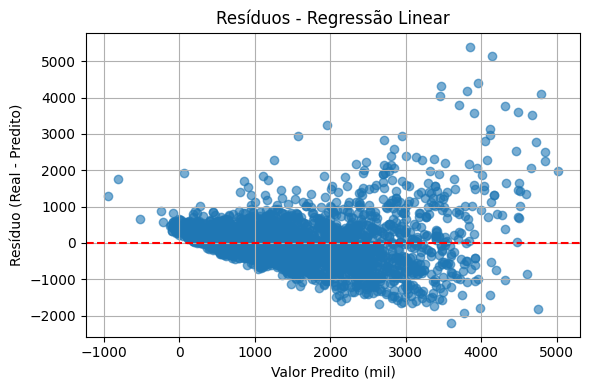

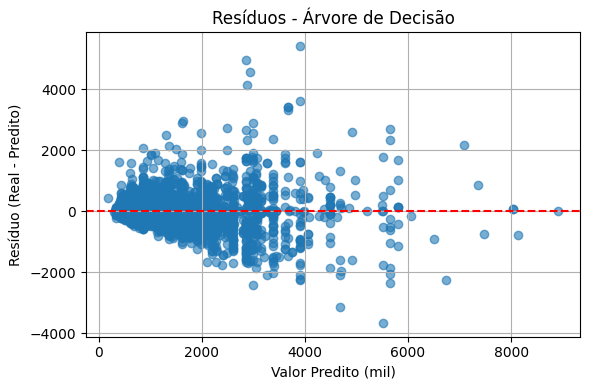

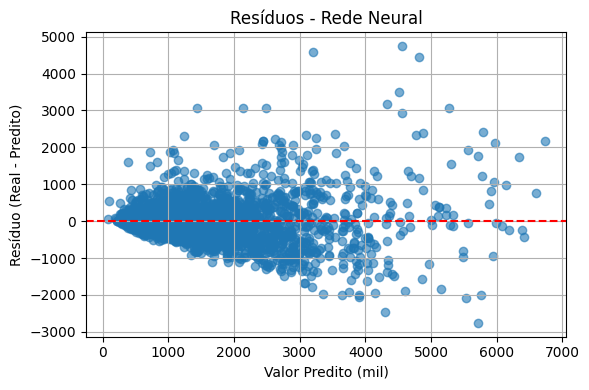

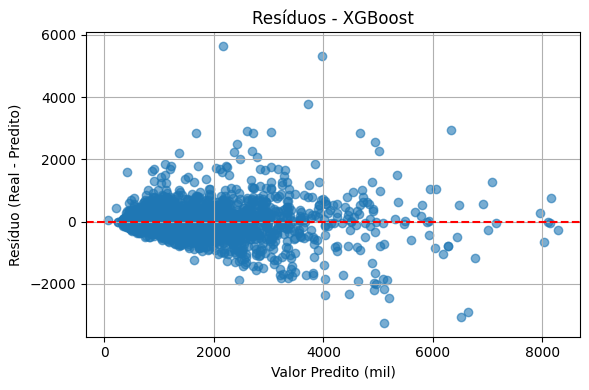

In [ ]:
def plot_residuals(y_test, y_pred, title):
    residuals = y_test - y_pred
    plt.figure(figsize=(6, 4))
    plt.scatter(y_pred, residuals, alpha=0.6)
    plt.axhline(0, color='r', linestyle='--')
    plt.xlabel("Valor Predito (mil)")
    plt.ylabel("Resíduo (Real - Predito)")
    plt.title(f"Resíduos - {title}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Regressão Linear
plot_residuals(y_test, y_pred_lr, "Regressão Linear")

# Árvore de Decisão
plot_residuals(y_test, y_pred_dt, "Árvore de Decisão")

# Rede Neural (sem embedding)
plot_residuals(y_test, y_pred_nn, "Rede Neural")

# XGBoost
plot_residuals(y_test, y_pred_xgb, "XGBoost")


Outras Arquitetruas

In [ ]:
!pip install pytorch-tabnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 103.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 78.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 85.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [ ]:
from pytorch_tabnet.tab_model import TabNetRegressor

# TabNet espera y em formato 2D
y_train_reshaped = y_train.values.reshape(-1, 1)
y_test_reshaped = y_test.values.reshape(-1, 1)

# Inicialização do modelo
tabnet_model = TabNetRegressor()

# Garanta que o y_train esteja como um array NumPy com tipo numérico (float32, por exemplo)
y_train_reshaped = y_train.values.astype(np.float32).reshape(-1, 1)
y_test_reshaped = y_test.values.astype(np.float32).reshape(-1, 1)

# E garanta também que X_train e X_test estejam no mesmo formato
X_train_np = X_train.values.astype(np.float32)
X_test_np = X_test.values.astype(np.float32)

tabnet_model.fit(
    X_train_np, y_train_reshaped,
    eval_set=[(X_test_np, y_test_reshaped)],
    max_epochs=100,
    patience=10,
    batch_size=32,
    virtual_batch_size=16,
    num_workers=0,
    drop_last=False
)

# Previsão
y_pred_tabnet = tabnet_model.predict(X_test.values.astype(np.float32)).flatten()

# Avaliação
print("TabNet - MSE:", mean_squared_error(y_test, y_pred_tabnet))
print("TabNet - RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_tabnet)))
print("TabNet - R²:", r2_score(y_test, y_pred_tabnet))
print("TabNet - MAPE:", mean_absolute_percentage_error(y_test, y_pred_tabnet))

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1220311.16507| val_0_mse: 367564.65625|  0:00:14s
epoch 1  | loss: 411239.2686| val_0_mse: 317470.4375|  0:00:28s
epoch 2  | loss: 376450.35585| val_0_mse: 328914.34375|  0:00:41s
epoch 3  | loss: 363869.66266| val_0_mse: 332509.90625|  0:00:57s
epoch 4  | loss: 356996.89513| val_0_mse: 306524.78125|  0:01:11s
epoch 5  | loss: 361898.22801| val_0_mse: 377495.28125|  0:01:24s
epoch 6  | loss: 371806.81239| val_0_mse: 315040.46875|  0:01:38s
epoch 7  | loss: 332287.94096| val_0_mse: 289778.1875|  0:01:51s
epoch 8  | loss: 329102.86526| val_0_mse: 332995.5|  0:02:05s
epoch 9  | loss: 326161.58803| val_0_mse: 383675.15625|  0:02:19s
epoch 10 | loss: 319739.53186| val_0_mse: 305865.5625|  0:02:32s
epoch 11 | loss: 323289.68259| val_0_mse: 301119.25|  0:02:46s
epoch 12 | loss: 332130.14532| val_0_mse: 351868.3125|  0:02:59s
epoch 13 | loss: 319376.32026| val_0_mse: 283004.5625|  0:03:12s
epoch 14 | loss: 318265.19321| val_0_mse: 291914.25|  0:03:26s
epoch 15 | loss: 319218.9

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


TabNet - MSE: 273035.3183210503
TabNet - RMSE: 522.5278158347652
TabNet - R²: 0.7409228357855959
TabNet - MAPE: 0.2554734299253277


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Add
from tensorflow.keras.optimizers import Adam

# Entrada
input_layer = Input(shape=(X_train.shape[1],))

x = Dense(128, activation='relu')(input_layer)

x = Dense(64, activation='relu')(x)

# Bloco residual
res = Dense(64, activation='relu')(x)
x = Add()([x, res])  # Skip connection (x + res)

x = Dense(32, activation='relu')(x)

# Saída
output_layer = Dense(1)(x)

# Modelo
model_residual = Model(inputs=input_layer, outputs=output_layer)
model_residual.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Treinamento
model_residual.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0, validation_split=0.1)

# Previsão
y_pred_residual = model_residual.predict(X_test).flatten()

# Avaliação
print("ResNet-like - MSE:", mean_squared_error(y_test, y_pred_residual))
print("ResNet-like - RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_residual)))
print("ResNet-like - R²:", r2_score(y_test, y_pred_residual))
print("ResNet-like - MAPE:", mean_absolute_percentage_error(y_test, y_pred_residual))

135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
ResNet-like - MSE: 230591.80786265744
ResNet-like - RMSE: 480.1997582909194
ResNet-like - R²: 0.7811965424858219
ResNet-like - MAPE: 0.21495774349630933


Alterações

In [ ]:
dt = DecisionTreeRegressor(max_depth=10, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Árvore de Decisão - MSE:", mean_squared_error(y_test, y_pred_dt))
print("Árvore de Decisão - RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt)))
print("Árvore de Decisão - R²:", r2_score(y_test, y_pred_dt))
print("Árvore de Decisão - MAPE:", mean_absolute_percentage_error(y_test, y_pred_dt))

Árvore de Decisão - MSE: 260564.51290060295
Árvore de Decisão - RMSE: 510.4552016588752
Árvore de Decisão - R²: 0.752756106747267
Árvore de Decisão - MAPE: 0.26031299854572204


In [ ]:
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, learning_rate=0.1, max_depth=11)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost - MSE:", mean_squared_error(y_test, y_pred_xgb))
print("XGBoost - RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("XGBoost - R²:", r2_score(y_test, y_pred_xgb))
print("XGBoost - MAPE:", mean_absolute_percentage_error(y_test, y_pred_xgb))

XGBoost - MSE: 177062.90401754293
XGBoost - RMSE: 420.78843142075914
XGBoost - R²: 0.8319889333639532
XGBoost - MAPE: 0.19229243911211302
